In [56]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from numpy import inf
import csv
from numpy import genfromtxt
#to get the name 

# 根据已经有的adj matrix，计算centrality

In [57]:
#尝试计算中心度数据
adj_folder = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/68_update for 20220429/adj_matrix by month'
all_files = glob.glob(adj_folder + "/*.csv")
outdir = '/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/65_update_the graph_of_joey_and_yijia_in_paper_202206/1_yijia_small netework data/centrality_weighted_06142022'

try:
    os.makedirs(outdir)
except FileExistsError:
    # directory already exists
    pass

ind=0

whole_network_mean_csv = pd.DataFrame(columns = ['Name','time','degree_centrality','betweenness_centrality',
                                      'closeness_centrality'])

whole_network_std_csv = pd.DataFrame(columns = ['Name','time','degree_centrality','betweenness_centrality',
                                      'closeness_centrality'])

for file in all_files:
    tmp = file.split('/')
    filename = tmp[-1].replace('.csv','').split('_')[-1]
    ind=ind+1
    
    #print(filename)
   


    data=pd.read_csv(file,index_col=0)
    name=data.columns.to_list()
    adj_s1 = data.to_numpy()
    #s1=genfromtxt(test_file,delimiter=',')
    #get matrix
    #adj_s1 = s1[1:,1:]
    #get networks
    gs1 = nx.from_numpy_matrix(adj_s1)
    gs1_dc = nx.degree_centrality(gs1)
    
    #gs1_bc=nx.betweenness_centrality((gs1))
    
    
    #get the inverse to calucate cc
    re1=np.reciprocal(adj_s1)
    re1[re1 == inf] = 0
   
    re_graph1=nx.from_numpy_matrix(re1)
    
    gs1_cc=nx.closeness_centrality((re_graph1))
    gs1_bc=nx.betweenness_centrality((re_graph1)) #weight all equal to the reverse of the email number
    time= tmp[-1].replace('.csv','').split('_')[-1]
    
    #gs1_den=nx.density(gs1)
    #calculate the clustering coefficient for the nodes
    #gs1_cl=nx.clustering(gs1)
    #gs1_acl=nx.average_clustering(gs1)
    import pandas as pd 
    gs1_csv = pd.DataFrame(columns = ['Time','Name','degree_centrality','betweenness_centrality',
                                      'closeness_centrality'])
                                     
    
    #print(name)
    for i in range(len(name)):
        name_va=name[i]
        gs1_dc_va=gs1_dc[i]
        gs1_bc_va=gs1_bc[i]
        gs1_cc_va=gs1_cc[i]

        gs1_csv=gs1_csv.append({'Time':time,'Name':name_va,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va
                       },ignore_index=True)
    
    
    gs1_csv.to_csv(outdir+'/'+filename+'_specific_centrality.csv',index=False)
    

   # add mean 
    
    name_va='Whole_network_mean'
    
    gs1_dc_va=gs1_csv.iloc[:,2].mean()
    gs1_bc_va=gs1_csv.iloc[:,3].mean()
    gs1_cc_va=gs1_csv.iloc[:,4].mean()
    
    
    time= tmp[-1].replace('.csv','').split('_')[-1]
    whole_network_mean_csv=whole_network_mean_csv.append({'Name':'mean', 'time':time,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va
                       },ignore_index=True)

    # add std 
    #print(gs1_csv)
    
    name_va='Whole_network_std'
    gs1_dc_va=gs1_csv.iloc[:,2].std()
    gs1_bc_va=gs1_csv.iloc[:,3].std()
    gs1_cc_va=gs1_csv.iloc[:,4].std()
    
    gs1_csv=gs1_csv.append({'Name':name_va,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va },ignore_index=True)
    
    time= tmp[-1].replace('.csv','').split('_')[-1]
    whole_network_std_csv=whole_network_std_csv.append({'Name':'std','time':time,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va },ignore_index=True)

    
    

<ipython-input-57-2fb746935b32>:43: RuntimeWarning: divide by zero encountered in reciprocal
  re1=np.reciprocal(adj_s1)


In [59]:
#增加没有的年份进来。 从cra的email network有邮件到没有邮件的阶段 20125-2016.10
for year in range(2012,2017):
    start = 1
    end = 12
    if year == 2012:
        start = 5
    if year == 2016:
        end = 10
    
    for mon in range(start,end+1):
        if mon<10:
            mon_str = '0'+str(mon)
        else:
            mon_str = str(mon)
        time_yr = str(year) + '-'+mon_str
        
        if time_yr not in whole_network_std_csv['time'].tolist():
            print(time_yr)
            
            whole_network_std_csv=whole_network_std_csv.append({'Name':'std','time':time_yr,'degree_centrality': 0,'betweenness_centrality':0,
                      'closeness_centrality':0 },ignore_index=True)

            whole_network_mean_csv=whole_network_mean_csv.append({'Name':'mean','time':time_yr,'degree_centrality': 0,'betweenness_centrality':0,
                      'closeness_centrality':0 },ignore_index=True)
        
#whole_network_std_csv.columns






2012-08
2012-09
2012-10
2014-06
2014-07
2014-11
2014-12
2015-02
2015-04
2015-05
2015-09
2015-10
2016-02
2016-03
2016-07
2016-09


In [115]:
#补充年份，和大网络的时间线一致 i.e.,2011.8-2017.9
for year in range(2011,2018):
    start = 1
    end = 12
    if year == 2011:
        start = 8
    if year == 2017:
        end = 9
    
    for mon in range(start,end+1):
        if mon<10:
            mon_str = '0'+str(mon)
        else:
            mon_str = str(mon)
        time_yr = str(year) + '-'+mon_str
        
        if time_yr not in whole_network_std_csv['time'].tolist():
            print(time_yr)
            
            whole_network_std_csv=whole_network_std_csv.append({'Name':'std','time':time_yr,'degree_centrality': 0,'betweenness_centrality':0,
                      'closeness_centrality':0 },ignore_index=True)

            whole_network_mean_csv=whole_network_mean_csv.append({'Name':'mean','time':time_yr,'degree_centrality': 0,'betweenness_centrality':0,
                      'closeness_centrality':0 },ignore_index=True)
        
#whole_network_std_csv.columns










2011-08
2011-09
2011-10
2011-11
2011-12
2012-01
2012-02
2012-03
2012-04
2016-11
2016-12
2017-01
2017-02
2017-03
2017-04
2017-05
2017-06
2017-07
2017-08
2017-09


In [116]:
whole_network_std_csv=whole_network_std_csv.sort_values(by=['time'])
#whole_network_std_csv.to_csv('whole_network_std_value20220614.csv',index=0)
#whole_network_std_csv.to_csv('whole_network_std_value20220614_201108_201709.csv',index=0)


In [117]:
whole_network_mean_csv=whole_network_mean_csv.sort_values(by=['time'])
#whole_network_mean_csv.to_csv('whole_network_mean_value20220614.csv',index=0)
#whole_network_mean_csv.to_csv('whole_network_mean_value20220614_201108_201709.csv',index=0)

In [118]:
whole_network_mean_csv

,Name,time,degree_centrality,betweenness_centrality,closeness_centrality
54,mean,2011-08,0.0,0.0,0.0
55,mean,2011-09,0.0,0.0,0.0
56,mean,2011-10,0.0,0.0,0.0
57,mean,2011-11,0.0,0.0,0.0
58,mean,2011-12,0.0,0.0,0.0
...,...,...,...,...,...
69,mean,2017-05,0.0,0.0,0.0
70,mean,2017-06,0.0,0.0,0.0
71,mean,2017-07,0.0,0.0,0.0
72,mean,2017-08,0.0,0.0,0.0


# 根据centrality， 画图

In [119]:
whole_network_mean_csv=pd.read_csv('whole_network_std_value20220614_201108_201709.csv')
whole_network_std_csv=pd.read_csv('whole_network_mean_value20220614_201108_201709.csv')

In [120]:


whole_network_mean_csv=whole_network_mean_csv.reset_index(drop=True)
whole_network_std_csv=whole_network_std_csv.reset_index(drop=True)


In [121]:
whole_network_mean_csv

,Name,time,degree_centrality,betweenness_centrality,closeness_centrality
0,std,2011-08,0.0,0.0,0.0
1,std,2011-09,0.0,0.0,0.0
2,std,2011-10,0.0,0.0,0.0
3,std,2011-11,0.0,0.0,0.0
4,std,2011-12,0.0,0.0,0.0
...,...,...,...,...,...
69,std,2017-05,0.0,0.0,0.0
70,std,2017-06,0.0,0.0,0.0
71,std,2017-07,0.0,0.0,0.0
72,std,2017-08,0.0,0.0,0.0


In [122]:
whole_network_std_csv['time'][0:]

0     2011-08
1     2011-09
2     2011-10
3     2011-11
4     2011-12
       ...   
69    2017-05
70    2017-06
71    2017-07
72    2017-08
73    2017-09
Name: time, Length: 74, dtype: object

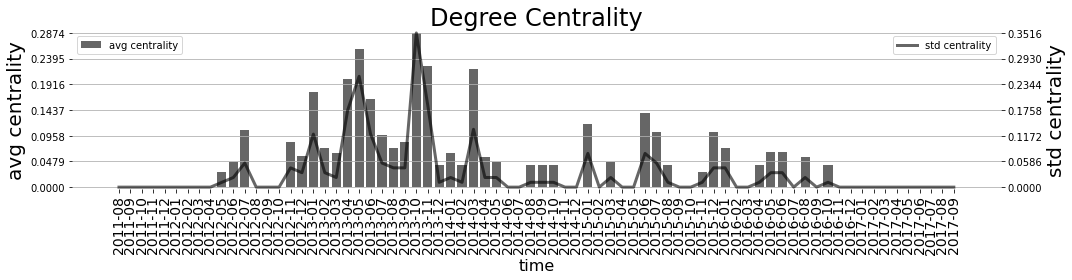

In [123]:
#plot degree centrality
fig, ax1 = plt.subplots(figsize = (15,4))

x = whole_network_mean_csv.iloc[:,2] #degree centrality
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title('Degree Centrality', fontsize = 24)
ax1.bar(np.arange(len(whole_network_mean_csv)), x, label = 'avg centrality', alpha = 0.6, color = 'black')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_xticks(np.arange(len(whole_network_mean_csv)))
ax1.set_xticklabels(whole_network_std_csv['time'][0:], rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='black', fontsize = 20)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#for ticklabel in plt.gca().get_xticklabels():
#    ticklabel.set_color(label_colors[ticklabel.get_text()])
ax1.grid(axis = 'y')

#     x = centrality_stats[start_idx:,3]
#     ax2 = ax1.twinx()
#     ax2.spines['right'].set_visible(False)
#     ax2.spines['left'].set_visible(False)
#     ax2.spines['top'].set_visible(False)
#     ax2.spines['bottom'].set_visible(False)


#     ax2.plot(x ,label = 'std centrality', c = 'black', linewidth = 3, ls = 'dashed')
#     ax2.set_ylabel('std centrality', color='black', fontsize = 20, x = 2.4, y = 0.5)
#     ax2.yaxis.set_label_coords(-0.14 ,0.5) 
#     ax2.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax2.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax2.legend(loc=2, bbox_to_anchor=(0.0,0.9))

x =whole_network_std_csv.iloc[:,2] #degree centrality std
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = 'std centrality', c = 'black', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('std centrality', color='black', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)


#x = graph_stats[start_idx:,1]

#ax4 = ax1.twinx()
#ax4.spines['right'].set_visible(False)
#ax4.spines['left'].set_visible(False)
#ax4.spines['top'].set_visible(False)
#     ax4.spines['bottom'].set_visible(False)
#     ax4.spines["right"].set_position(("axes", 1.08))
#     ax4.plot(x, label = 'modified density', c = 'black', linewidth = 2, alpha = 0.6)
#     ax4.set_ylabel('modified density', color='black', fontsize = 20, x = 1.2, y = 0.5)
#     ax4.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax4.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax4.legend(loc=1, bbox_to_anchor=(1.0,0.9))

plt.tight_layout()
#plt.show()
plt.savefig("degree_centrality_longtime.png",dpi=300)







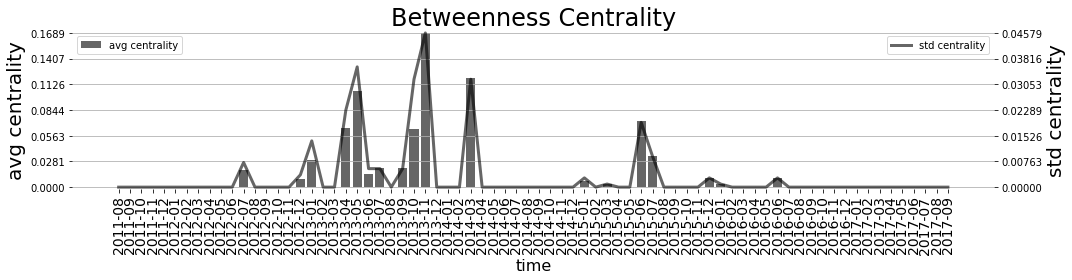

In [124]:
#plot betweenness centrality
fig, ax1 = plt.subplots(figsize = (15,4))

x = whole_network_mean_csv.iloc[:,3] #betweenness centrality
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title('Betweenness Centrality', fontsize = 24)
ax1.bar(np.arange(len(whole_network_mean_csv)), x, label = 'avg centrality', alpha = 0.6, color = 'black')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_xticks(np.arange(len(whole_network_mean_csv)))
ax1.set_xticklabels(whole_network_std_csv['time'][0:], rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='black', fontsize = 20)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#for ticklabel in plt.gca().get_xticklabels():
#    ticklabel.set_color(label_colors[ticklabel.get_text()])
ax1.grid(axis = 'y')

#     x = centrality_stats[start_idx:,3]
#     ax2 = ax1.twinx()
#     ax2.spines['right'].set_visible(False)
#     ax2.spines['left'].set_visible(False)
#     ax2.spines['top'].set_visible(False)
#     ax2.spines['bottom'].set_visible(False)


#     ax2.plot(x ,label = 'std centrality', c = 'black', linewidth = 3, ls = 'dashed')
#     ax2.set_ylabel('std centrality', color='black', fontsize = 20, x = 2.4, y = 0.5)
#     ax2.yaxis.set_label_coords(-0.14 ,0.5) 
#     ax2.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax2.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax2.legend(loc=2, bbox_to_anchor=(0.0,0.9))

x =whole_network_std_csv.iloc[:,3] #betweenness centrality std
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = 'std centrality', c = 'black', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('std centrality', color='black', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)


#x = graph_stats[start_idx:,1]

#ax4 = ax1.twinx()
#ax4.spines['right'].set_visible(False)
#ax4.spines['left'].set_visible(False)
#ax4.spines['top'].set_visible(False)
#     ax4.spines['bottom'].set_visible(False)
#     ax4.spines["right"].set_position(("axes", 1.08))
#     ax4.plot(x, label = 'modified density', c = 'black', linewidth = 2, alpha = 0.6)
#     ax4.set_ylabel('modified density', color='black', fontsize = 20, x = 1.2, y = 0.5)
#     ax4.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax4.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax4.legend(loc=1, bbox_to_anchor=(1.0,0.9))

plt.tight_layout()
#plt.show()
plt.savefig("betweeness_centrality_long time.png",dpi=300)







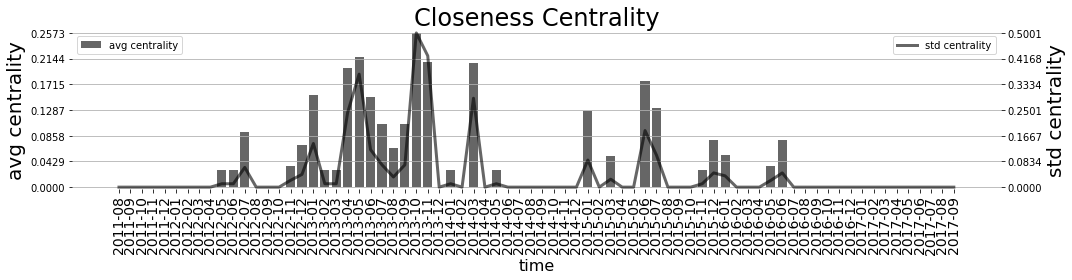

In [126]:
#plot closeness centrality
fig, ax1 = plt.subplots(figsize = (15,4))

x = whole_network_mean_csv.iloc[:,4] #closeness centrality
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title('Closeness Centrality', fontsize = 24)
ax1.bar(np.arange(len(whole_network_mean_csv)), x, label = 'avg centrality', alpha = 0.6, color = 'black')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_xticks(np.arange(len(whole_network_mean_csv)))
ax1.set_xticklabels(whole_network_std_csv['time'][0:], rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='black', fontsize = 20)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#for ticklabel in plt.gca().get_xticklabels():
#    ticklabel.set_color(label_colors[ticklabel.get_text()])
ax1.grid(axis = 'y')

x =whole_network_std_csv.iloc[:,4] #closeness centrality std
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = 'std centrality', c = 'black', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('std centrality', color='black', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)

plt.tight_layout()
#plt.show()
plt.savefig("closeness_centrality_long_time.png",dpi=300)







In [113]:
whole_network_mean_csv.tail(5)

,Name,time,degree_centrality,betweenness_centrality,closeness_centrality
49,mean,2016-06,0.032967,0.002747,0.046154
50,mean,2016-07,0.000000,0.000000,0.000000
51,mean,2016-08,0.021978,0.000000,0.000000
52,mean,2016-09,0.000000,0.000000,0.000000
53,mean,2016-10,0.010989,0.000000,0.000000


In [114]:
ls

1_draw email network for whole period.ipynb
2 try to separate the email file by month_and draw pic20220427.ipynb
CRA_and_city_commissioner_email_netework.png
betweeness_centrality.png
centrality_weighted_06142022/
closeness_centrality.png
degree_centrality.png
df_comm&cra_s10403.csv
df_comm&cra_s20403.csv
df_comm&cra_s30403.csv
df_comm&cra_s40403.csv
whole stage adj matrix.csv
whole_network_mean_value20220614.csv
whole_network_std_value20220614.csv


# 下一步批量读取按月的centrality，然后合并数据

In [127]:
ls

1_draw email network for whole period.ipynb
2 try to separate the email file by month_and draw pic20220614.ipynb
CRA_and_city_commissioner_email_netework.png
betweeness_centrality.png
betweeness_centrality_long time.png
centrality_weighted_06142022/
closeness_centrality.png
closeness_centrality_long_time.png
degree_centrality.png
degree_centrality_longtime.png
df_comm&cra_s10403.csv
df_comm&cra_s20403.csv
df_comm&cra_s30403.csv
df_comm&cra_s40403.csv
whole stage adj matrix.csv
whole_network_mean_value20220614.csv
whole_network_mean_value20220614_201108_201709.csv
whole_network_std_value20220614.csv
whole_network_std_value20220614_201108_201709.csv


In [128]:
import glob

In [130]:
all_month=[]
for name in glob.glob('centrality_weighted_06142022/*.csv'):
    month=pd.read_csv(name)
    all_month.append(month)
    
    

       

In [132]:
pd_allmonth=pd.concat(all_month)
pd_allmonth

,Time,Name,degree_centrality,betweenness_centrality,closeness_centrality
0,2014-03,johndailey,0.076923,0.000000,0.366516
1,2014-03,bryandesloge,0.076923,0.000000,0.366516
2,2014-03,janesauls,0.076923,0.000000,0.366516
3,2014-03,nickmaddox,0.076923,0.000000,0.366516
4,2014-03,lindleymary,0.000000,0.000000,0.000000
...,...,...,...,...,...
9,2013-01,markmustian,0.000000,0.000000,0.000000
10,2013-01,gilziffer,0.230769,0.064103,0.307692
11,2013-01,curtisrichardson,0.000000,0.000000,0.000000
12,2013-01,nancymiller,0.461538,0.032051,0.346154


In [133]:
pd_allmonth = pd_allmonth.sort_values(by='Time')

In [134]:
pd_allmonth

,Time,Name,degree_centrality,betweenness_centrality,closeness_centrality
9,2012-05,markmustian,0.0,0.0,0.0
0,2012-05,johndailey,0.0,0.0,0.0
1,2012-05,bryandesloge,0.0,0.0,0.0
2,2012-05,janesauls,0.0,0.0,0.0
3,2012-05,nickmaddox,0.0,0.0,0.0
...,...,...,...,...,...
3,2016-10,nickmaddox,0.0,0.0,0.0
2,2016-10,janesauls,0.0,0.0,0.0
1,2016-10,bryandesloge,0.0,0.0,0.0
0,2016-10,johndailey,0.0,0.0,0.0


In [136]:
#pd_allmonth.to_csv('all cra commissioner centrality by month.csv',index=0)